In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.offline import iplot
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('husl')

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

import warnings
warnings.filterwarnings("ignore")
pd.set_option('future.no_silent_downcasting', True)
pd.options.mode.copy_on_write = "warn"

In [ ]:
# сразу напишем код функции, которая будет вычислять все нужные метрики
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter
def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

    # Calculating Adjusted R-squared
    r2 = model.score(X_test, y_test)
    # Number of observations is the shape along axis 0
    n = X_test.shape[0]
    # Number of features (predictors, p) is the shape along axis 1
    p = X_test.shape[1]
    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    print(f'RMSE:  {round(RMSE,4)}\n  R2: {round(R2,4)}\n Adjusted R2: {round(adjusted_r2, 4)}\n Cross Validated R2: {round(cv_score.mean(),4)}')
    return R2, adjusted_r2, CV_R2, RMSE

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
table = pd.read_csv('/content/drive/MyDrive/Учеба/10 трим/Машинное обучение/итоговый проект/Salary Data.csv', encoding='utf-8', sep=',')
table.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
# Adding Line To Plotly Figure
def add_line(x0 = 0, y0 = 0, x1 = 0, y1 = 0,
             line_color = "#00DFA2", font_color = "#3C486B",
             xposition = "right", text = "Text"):
    fig.add_shape(type='line',
                  x0 = x0,
                  y0 = y0,
                  x1 = x1,
                  y1 = y1 + 2,
                  line = {
                      "color" : line_color,
                      "width" : 3,
                      "dash" : "dashdot"
                  },
                  label={
                      "text" : f"\t{text}: {x1: 0.1f}\t".expandtabs(5),
                      "textposition": "end",
                      "yanchor" :"top",
                      "xanchor" :xposition,
                      "textangle" :0,
                      "font": {
                          "size": 14,
                          "color" :font_color,
                          "family" : "arial"

                      },
                  }
                 )

In [ ]:
def custome_layout(title_size = 28, hover_font_size = 16, showlegend = False):
    fig.update_layout(
    showlegend = showlegend,
    title = {
        "font" :{
            "size" :title_size,
            "family" : "tahoma"
        }
    },
    hoverlabel = {
        "bgcolor" :"#111",
        "font_size" : hover_font_size,
        "font_family" :"arial"
    }

)

In [ ]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [ ]:
table.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,373.0,37.431635,7.069073,23.0,31.0,36.0,44.0,53.0
Years of Experience,373.0,10.030831,6.557007,0.0,4.0,9.0,15.0,25.0
Salary,373.0,100577.345845,48240.013482,350.0,55000.0,95000.0,140000.0,250000.0


In [ ]:
# Удаляем пустые значения
table.dropna(inplace=True)

In [ ]:
# Проверяем на дубликаты
table.drop_duplicates(inplace=True)

# Reset Our Index to be Orderd
table.reset_index(inplace=True, drop=True)

Проведем исследования по колонкам

In [ ]:
mean_of_age = table["Age"].mean()
median_of_age = table["Age"].median()

In [ ]:
fig = px.box(
    y=table["Age"],
    title= "Распределение по возрастам",
    template="plotly_dark",
    labels={"y" :"Возраст"},
)
custome_layout()

iplot(fig)

In [ ]:
fig = px.histogram(
    table["Age"],
    nbins=25,
    title= "Распределение по возрастам",
    template="plotly_dark",
    labels={"value" :"Возраст"}
)

custome_layout()
fig.update_traces(
    textfont = {
        "size" : 20,
        "family" :"tahoma",
        "color": "#fff"
    },
    hovertemplate = "Возраст: %{x}<br>Количество: %{y}",
    marker=dict(line=dict(color='#000', width=0.1))
)


# Adding Mean Line
add_line(x0=mean_of_age, y0=0, x1=mean_of_age, y1=30+2, line_color="#E97777",font_color="#E97777",
         text="Mean", xposition="left")

# Adding Median Line
add_line(x0=median_of_age, y0=0, x1=median_of_age, y1=30+2, line_color="#FFE5F1",
         font_color="#fff", xposition="right", text="Median")

iplot(fig)

In [ ]:
gender = table["Gender"].value_counts(normalize=1) * 100
gender.apply(lambda x: f"{x:0.2f}%")
fig = px.bar(data_frame = gender,
             x = gender.index,
             y = gender,
             color = gender.index,
             title = "Гендерное соотношение в процентах",
             color_discrete_sequence=["#45FFCA", "#FF9B9B"],
             labels= {"index" :"Gender", "y": "Процент(%)"},
             template="plotly_dark",
             text = gender.apply(lambda x: f"{x:0.0f}%"))

custome_layout()


fig.update_traces(
    textfont = {
        "size" : 16,
        "family" :"arial",
        "color": "#222"
    },
    hovertemplate = "Пол: %{x}<br>Процент: %{y:0.1f}%",
)

iplot(fig)

In [ ]:
education = table["Education Level"].value_counts(normalize=1) * 100
education.apply(lambda x: f"{x:0.2f}%")
fig = px.bar(data_frame = education,
             x = education.index,
             y = education,
             color = education.index,
             title = "Соотношение образования",
             color_discrete_sequence=["#45FFCA", "#D09CFA", "#FF9B9B"],
             labels= {"index" :"Education", "y": "Процент по образованию"},
             template="plotly_dark",
             text = education.apply(lambda x: f"{x:0.0f}%"))

custome_layout()


fig.update_traces(
    textfont = {
        "size" : 16,
        "family" :"arial",
        "color": "#222"
    },
    hovertemplate = "Образование: %{x}<br>Проценты: %{y:0.1f}%",
)

iplot(fig)

In [ ]:
fig = px.box(
    y=table["Years of Experience"],
    title= "Распределение опыта, лет",
    template="plotly_dark",
    labels={"y" :"Лет опыта"},
)
custome_layout()

iplot(fig)

In [ ]:
fig = px.box(
    x = table["Education Level"], y = table["Salary"],
    title= "Зарплата Vs. Уровень образования",
    template="plotly_dark",
    labels={"x": "Уровень образования", "y" :"Зарплата"}
)

custome_layout(hover_font_size=13)

iplot(fig)

In [ ]:
# Средняя зарплата кадого пола
salary_by_gender = table.groupby("Gender")["Salary"].mean().sort_values(ascending=False)
salary_by_gender.apply(lambda x: f"${x:,.2f}")
fig = px.bar(data_frame = salary_by_gender,
             x = salary_by_gender.index,
             y = salary_by_gender,
             color = salary_by_gender.index,
             title = "Средняя зарплата по полам",
             color_discrete_sequence=["#45FFCA", "#D09CFA", "#FF9B9B"],
             labels= {"index" :"Education", "y": "Частота"},
             template="plotly_dark",
             text_auto = "0.4s"
            )

custome_layout()


fig.update_traces(
    textfont = {
        "size" : 16,
        "family" :"arial",
        "color": "#222"
    },
    hovertemplate = "Пол: %{x}<br>Частота: $%{y:0.4s}",
)

iplot(fig)

In [ ]:
#Влияние уровня образования на зарплату
salary_by_education = table.groupby("Education Level")["Salary"].mean().sort_values(ascending=False)
salary_by_education.apply(lambda x: f"${x:,.2f}")
fig = px.bar(data_frame = salary_by_education,
             x = salary_by_education.index,
             y = salary_by_education,
             color = salary_by_education.index,
             title = "Зарплата в зависимоти от образования",
             color_discrete_sequence=["#45FFCA", "#D09CFA", "#FF9B9B"],
             labels= {"index" :"Образование", "y": "Процентное соотношение"},
             template="plotly_dark",
             text_auto = "0.4s"
            )

custome_layout()


fig.update_traces(
    textfont = {
        "size" : 16,
        "family" :"arial",
        "color": "#222"
    },
    hovertemplate = "Уровень образования: %{x}<br>Average Salary: $%{y:0.4s}",
)

iplot(fig)

In [ ]:
def groupping_exp(exp):
    if exp >= 0 and exp <= 5:
        return "0-5 years"
    elif exp > 5 and exp <= 10:
        return "6-10 years"
    elif exp > 10 and exp <= 15:
        return "11-15 years"
    elif exp > 15 and exp <= 20:
        return "16-20 years"
    else:
        return "20+"

In [ ]:
salary_by_exp = table.groupby(table["Years of Experience"].apply(groupping_exp))["Salary"].mean().sort_values(ascending=False)
salary_by_exp.apply(lambda x: f"${x:,.2f}")
fig = px.bar(data_frame = salary_by_exp,
             x = salary_by_exp.index,
             y = salary_by_exp,
             color = salary_by_exp.index,
             title = "Зарплата в зависимости от рабочего стажа",
             color_discrete_sequence=["#45FFCA", "#D09CFA", "#FF9B9B", "#F875AA", "#3EDBF0"],
             labels= {"index" :"Education", "y": "Зарплата"},
             template="plotly_dark",
             text_auto = "0.4s"
            )

custome_layout()


fig.update_traces(
    textfont = {
        "size" : 16,
        "family" :"arial",
        "color": "#222"
    },
    hovertemplate = "Рабочий стаж: %{x}<br>Зарплата $%{y:0.4s}",
)

iplot(fig)

In [ ]:
#Перевод категориальных параметров в количественные
table['Gender'] = pd.factorize(table['Gender'])[0]
table['Education Level'] = pd.factorize(table['Education Level'])[0]
table['Job Title'] = pd.factorize(table['Job Title'])[0]

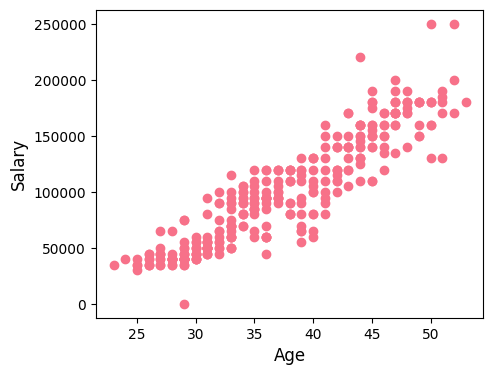

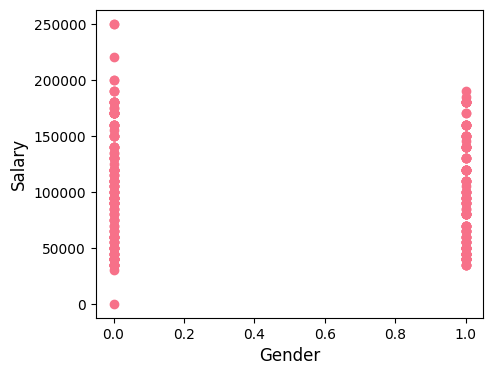

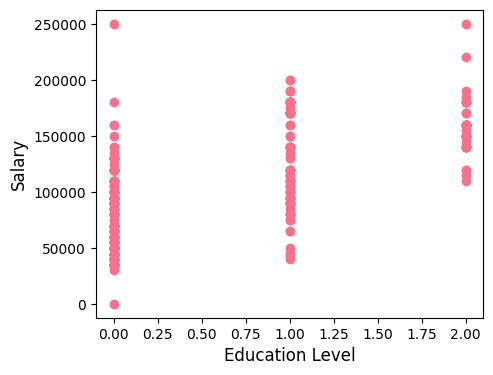

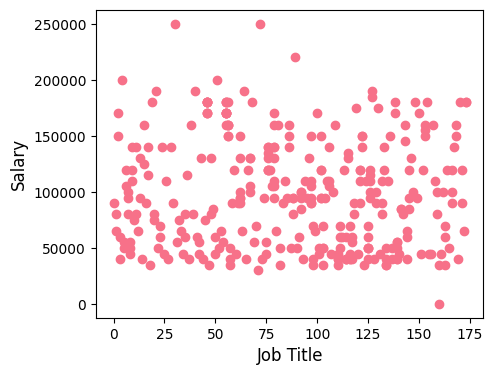

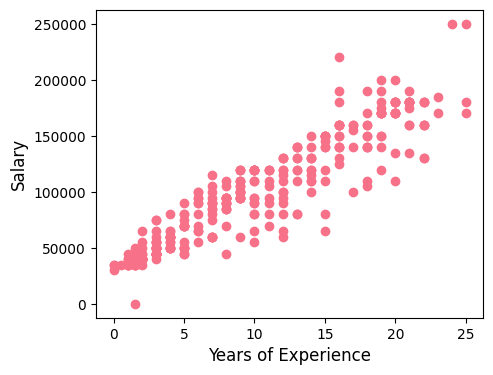

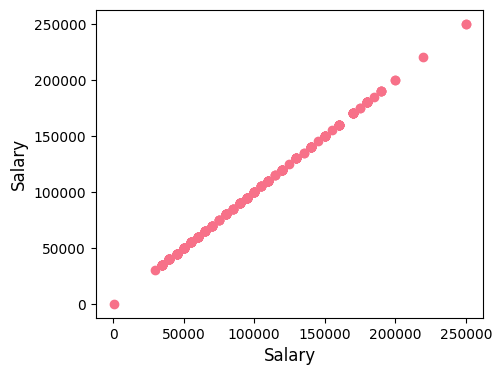

In [ ]:
for index, feature_name in enumerate(table.columns):
  plt.figure(figsize=(5, 4))
  plt.scatter(table[feature_name],table['Salary'])
  plt.ylabel("Salary", size=12)
  plt.xlabel(feature_name, size=12)
  plt.show()

<Axes: >

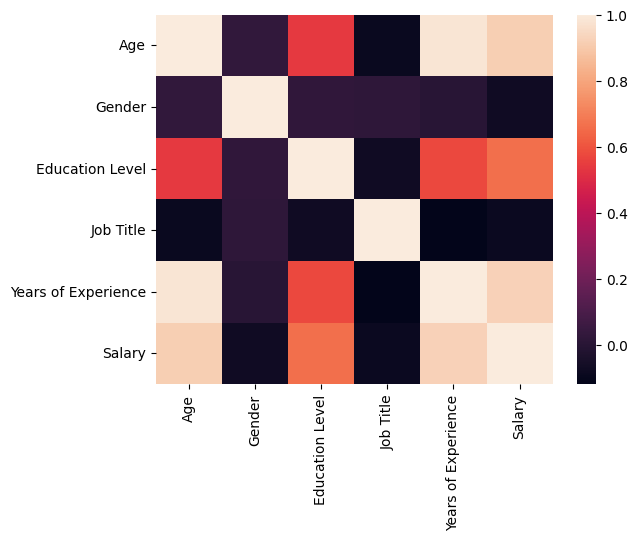

In [ ]:
sns.heatmap(table.corr())

In [ ]:
# подготавливаем датасет к обучению

X = table.drop(['Salary'], axis=1)
y = table['Salary']
print(f'X shape: {X.shape} | y shape: {y.shape} ')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

X shape: (324, 5) | y shape: (324,) 


In [ ]:
from sklearn.linear_model import LinearRegression

# Линейная регрессия
modelLR = LinearRegression()

# Fit the model to the data
modelLR.fit(X_train, y_train)

# Predict the response for a new data point
y_pr_LR = modelLR.predict(X_test)
_ = Reg_Models_Evaluation_Metrics(modelLR, X_train, y_train, X_test, y_test, y_pr_LR)

RMSE:  16546.3886
  R2: 0.9105
 Adjusted R2: 0.903
 Cross Validated R2: 0.876


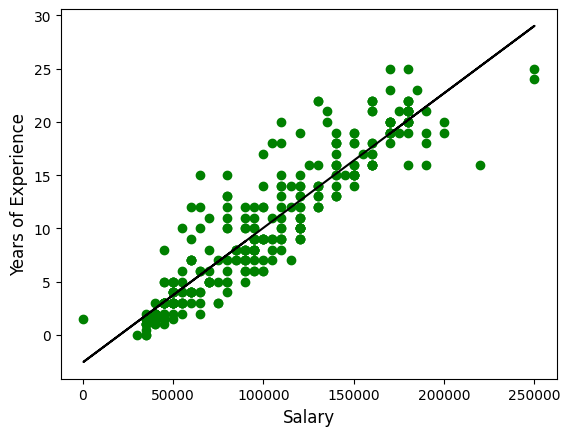

In [ ]:
# попробуем отрисовать, как выглядит наша линейная регрессия

X2 = table['Salary'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = table['Years of Experience'].values


model2 = LinearRegression()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('Years of Experience', size=12)
plt.xlabel('Salary', size=12)
plt.show()

In [ ]:
#ПОЛИНОМИНАЛЬНАЯ РЕГРЕССИЯ
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)

poly_features = poly.fit_transform(X)
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)
# Create a linear regression model
modelPR = LinearRegression()

# Fit the model to the data
modelPR.fit(X_p_train, y_p_train)

# Predict the response for a new data point
y_pr_PR = modelPR.predict(X_p_test)

_ = Reg_Models_Evaluation_Metrics(modelPR, X_p_train, y_p_train, X_p_test, y_p_test, y_pr_PR)

RMSE:  22222.908
  R2: 0.7883
 Adjusted R2: 0.5111
 Cross Validated R2: 0.8777


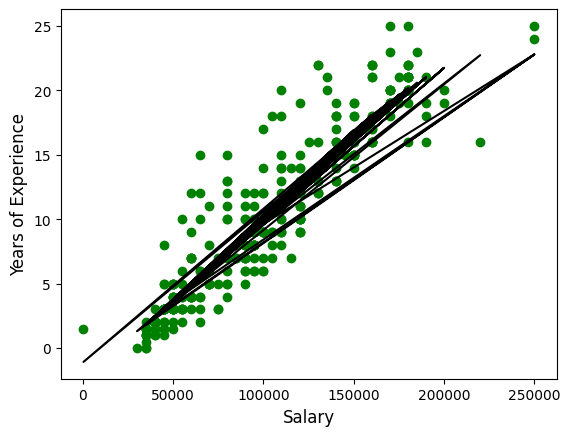

In [ ]:
X2 = table['Salary'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = table['Years of Experience'].values

poly_features = poly.fit_transform(X2)

model2 = LinearRegression()
model2.fit(poly_features, y2)


plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='k')
plt.ylabel('Years of Experience', size=12)
plt.xlabel('Salary', size=12)
plt.show()

In [ ]:
#РЕГРЕССИЯ ДЕРЕВА ПРИНЯТИЯ РЕШЕНИЙ
from sklearn.tree import DecisionTreeRegressor

# Create a stepwise regression model
modelDT = DecisionTreeRegressor()

# Fit the model to the data
modelDT.fit(X_train, y_train)

# Predict the response for a new data point
y_dt_pred = modelDT.predict(X_test)
_ = Reg_Models_Evaluation_Metrics(modelDT, X_train, y_train, X_test, y_test, y_dt_pred)

RMSE:  16184.3336
  R2: 0.9144
 Adjusted R2: 0.9072
 Cross Validated R2: 0.7737


In [ ]:
#РЕГРЕССИЯ СЛУЧАЙНОГО ЛЕСА
from sklearn.ensemble import RandomForestRegressor

# Create a stepwise regression model
modelRF = RandomForestRegressor(n_estimators=100)

# Fit the model to the data
modelRF.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelRF.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelRF, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  14617.4317
  R2: 0.9302
 Adjusted R2: 0.9243
 Cross Validated R2: 0.87


In [ ]:
#РЕГРЕССИЯ ОПОРНЫХ ВЕКТОРОВ
from sklearn.svm import SVR

# Create a support vector regression model
modelSVR = SVR(kernel='linear')

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)


RMSE:  38747.4996
  R2: 0.5094
 Adjusted R2: 0.4678
 Cross Validated R2: 0.4666


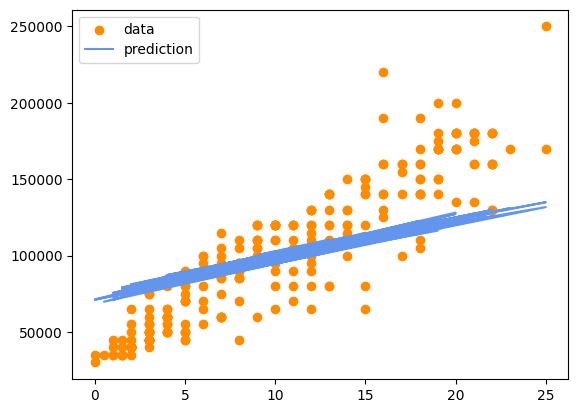

In [ ]:
plt.scatter(X_train["Years of Experience"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Years of Experience"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [ ]:
from sklearn.svm import SVR

# Create a support vector regression model. Полиномиальное ядро
modelSVR = SVR(kernel='poly')

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  55462.5935
  R2: -0.0051
 Adjusted R2: -0.0903
 Cross Validated R2: -0.0424


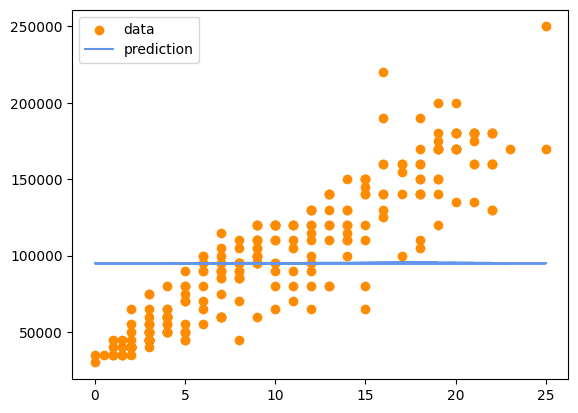

In [ ]:
plt.scatter(X_train["Years of Experience"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Years of Experience"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [ ]:
#Регрессия ElasticNet
from sklearn.linear_model import ElasticNet

# Create an elastic net regression model
modelEN = ElasticNet(alpha=0.1, l1_ratio=0.8)

# Fit the model to the data
modelEN.fit(X_train, y_train)

# Predict the response for a new data point
y_en_pred = modelEN.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelEN, X_train, y_train, X_test, y_test, y_en_pred)

RMSE:  16522.3274
  R2: 0.9108
 Adjusted R2: 0.9032
 Cross Validated R2: 0.8757


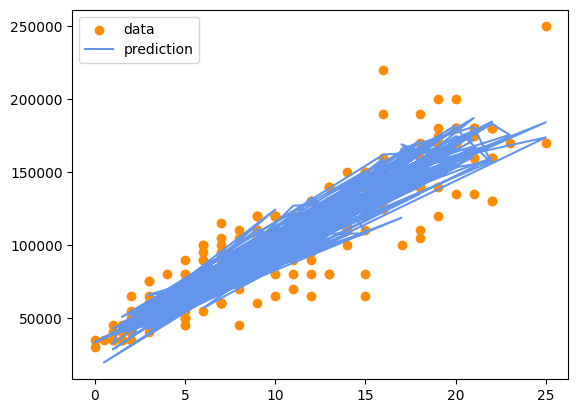

In [ ]:
plt.scatter(X_train["Years of Experience"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Years of Experience"], modelEN.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

Самый наилучший вариант выдала регрессия случайного дерева, выбираем ее

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=30)

In [ ]:
rf = RandomForestRegressor(n_estimators=500, random_state=11)

In [ ]:
scores = cross_val_score(rf, X, y, cv=kf)
print(f"Cross Validation Score: {np.mean(scores)*100:0.2f}%")

Cross Validation Score: 88.37%


In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=11)

In [ ]:
score = rf.score(X_train, y_train)*100
print(f"Model Score: {np.round(score, 2)}%")

Model Score: 98.34%


In [ ]:
predicted_salary = np.round(rf.predict(X_test))

In [ ]:
d = {
    "Actual_Salary" : y_test,
    "Predicted_Salary" : predicted_salary,
    "error": predicted_salary - y_test
}
predected_df = pd.DataFrame(d)
predected_df.head()

,Actual_Salary,Predicted_Salary,error
305,160000.0,156690.0,-3310.0
44,130000.0,128120.0,-1880.0
165,35000.0,35490.0,490.0
225,70000.0,62330.0,-7670.0
282,160000.0,183820.0,23820.0


In [ ]:
score = r2_score(y_test, predicted_salary)*100
print(f"Model Score: {np.round(score, 2)}%")

Model Score: 93.07%


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, predicted_salary))
print(f"Error Ratio: {rmse:.3f}")

Error Ratio: 14559.607


In [ ]:
fig = px.scatter(
    predected_df,
    x = "Actual_Salary",
    y = "Predicted_Salary",
    color = "error",
    opacity=0.8,
    title= "Predicted Vs. Actual",
    template="plotly_dark",
    trendline="ols"

)

fig.update_layout(
    title = {
        "font" :{
            "size" : 28,
            "family" : "tahoma"
        }
    }
)
iplot(fig)